# Boston Crime Dataset


## Import Libraries <a class="anchor" id="import-libraries"></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import zipfile

## Load Datasets

In [7]:
crime_data = pd.read_csv('input/crime.csv')

## Basis Analysis

In [8]:
crime_data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [9]:
crime_data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [10]:
crime_data.SHOOTING.value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [11]:
crime_data.SHOOTING.fillna('N', inplace=True)
crime_data.SHOOTING.replace({'Y':True, 'N':False}, inplace=True)

In [12]:
crime_data.SHOOTING.value_counts(dropna=False)

False    318054
True       1019
Name: SHOOTING, dtype: int64

In [13]:
crime_data.STREET.value_counts(dropna=False)

WASHINGTON ST      14194
NaN                10871
BLUE HILL AVE       7794
BOYLSTON ST         7221
DORCHESTER AVE      5149
                   ...  
VALE CT                1
OLEANDER ST            1
SPECTALE ISLAND        1
AUBURN SQ              1
WINGATE RD             1
Name: STREET, Length: 4658, dtype: int64

In [14]:
crime_data.INCIDENT_NUMBER.value_counts()

I162030584    13
I152080623    11
I172096394    10
I172013170    10
I182065208    10
              ..
I162079710     1
I162017259     1
I172092877     1
I182000585     1
I172020031     1
Name: INCIDENT_NUMBER, Length: 282517, dtype: int64

In [15]:
crime_data.loc[1]

INCIDENT_NUMBER                         I182070943
OFFENSE_CODE                                  1402
OFFENSE_CODE_GROUP                       Vandalism
OFFENSE_DESCRIPTION                      VANDALISM
DISTRICT                                       C11
REPORTING_AREA                                 347
SHOOTING                                     False
OCCURRED_ON_DATE               2018-08-21 00:00:00
YEAR                                          2018
MONTH                                            8
DAY_OF_WEEK                                Tuesday
HOUR                                             0
UCR_PART                                  Part Two
STREET                                    HECLA ST
Lat                                      42.306821
Long                                      -71.0603
Location               (42.30682138, -71.06030035)
Name: 1, dtype: object

In [16]:
crime_data.loc[1].Location

'(42.30682138, -71.06030035)'

In [39]:
crime_data[crime_data.INCIDENT_NUMBER == "I172013170"].head(10).T

,154804,154805,154806,154807,154808,154809,154810,154811,154812,154813
INCIDENT_NUMBER,I172013170,I172013170,I172013170,I172013170,I172013170,I172013170,I172013170,I172013170,I172013170,I172013170
OFFENSE_CODE,423,1842,1846,1849,2610,3125,802,1300,1503,2619
OFFENSE_CODE_GROUP,Aggravated Assault,Drug Violation,Drug Violation,Drug Violation,Other,Warrant Arrests,Simple Assault,Recovered Stolen Property,Firearm Violations,Prisoner Related Incidents
OFFENSE_DESCRIPTION,ASSAULT - AGGRAVATED,"DRUGS - POSS CLASS A - HEROIN, ETC.",DRUGS - POSS CLASS E,"DRUGS - POSS CLASS B - COCAINE, ETC.",TRESPASSING,WARRANT ARREST,ASSAULT SIMPLE - BATTERY,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",FUGITIVE FROM JUSTICE
DISTRICT,D4,D4,D4,D4,D4,D4,D4,D4,D4,D4
REPORTING_AREA,171,171,171,171,171,171,171,171,171,171
SHOOTING,False,False,False,False,False,False,False,False,False,False
OCCURRED_ON_DATE,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00,2017-02-17 17:45:00
YEAR,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
MONTH,2,2,2,2,2,2,2,2,2,2


In [18]:
crime_data.INCIDENT_NUMBER.unique().__len__()

282517

In [19]:
crime_data.INCIDENT_NUMBER.count()

319073

In [20]:
crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

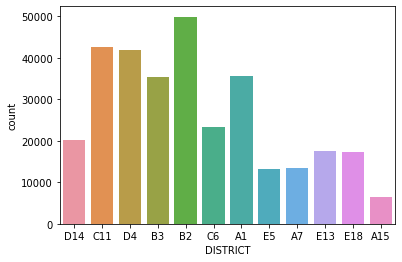

In [21]:
sns.countplot(data=crime_data,
              x='DISTRICT'
             )

In [22]:
crime_data.DISTRICT.value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

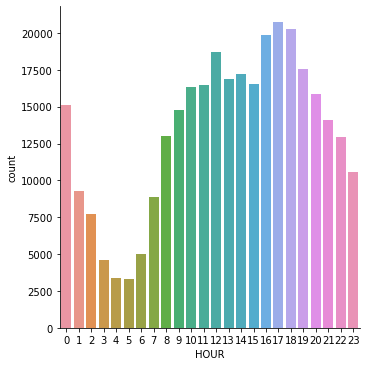

In [23]:
sns.catplot(x='HOUR',
           kind='count',
           data=crime_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOUR', ylabel='Density'>

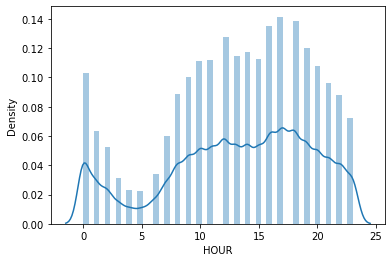

In [24]:
sns.distplot(crime_data['HOUR'])

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [26]:
min(crime_data.OCCURRED_ON_DATE)

'2015-06-15 00:00:00'

In [27]:
max(crime_data.OCCURRED_ON_DATE)

'2018-09-03 21:25:00'

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

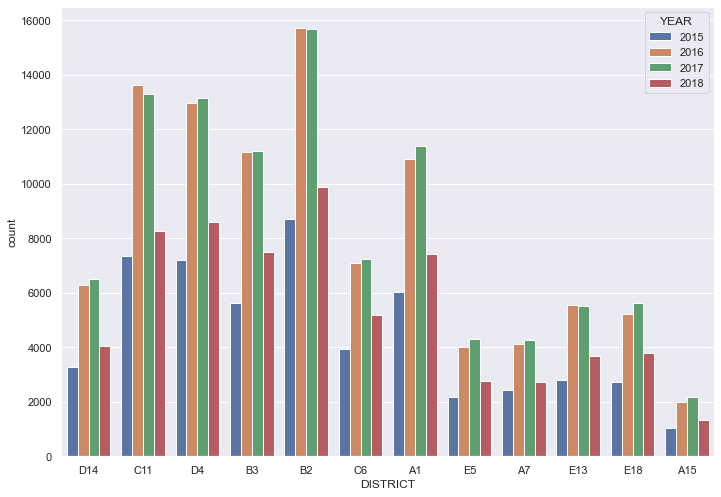

In [28]:
sns.countplot(data=crime_data,
              x='DISTRICT',
              hue='YEAR')

In [29]:
crime_data = crime_data[crime_data["YEAR"].isin([2016,2017,2018])]

In [30]:
crime_data.YEAR.value_counts(dropna=False)

2017    100886
2016     99114
2018     65685
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

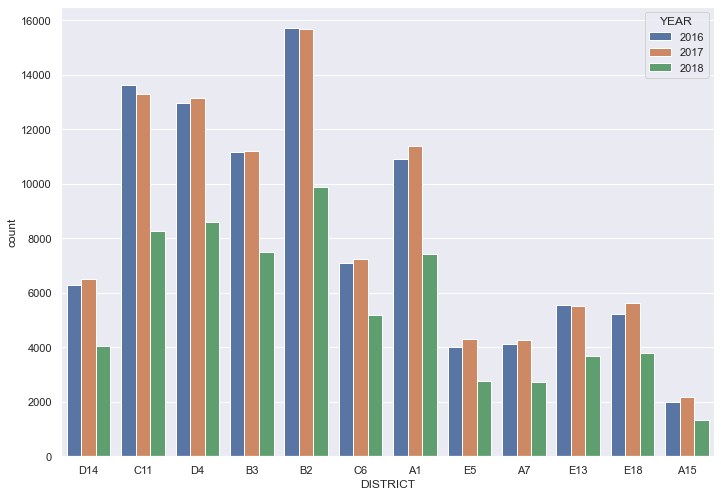

In [31]:
sns.countplot(data=crime_data,
              x='DISTRICT',
              hue='YEAR')

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

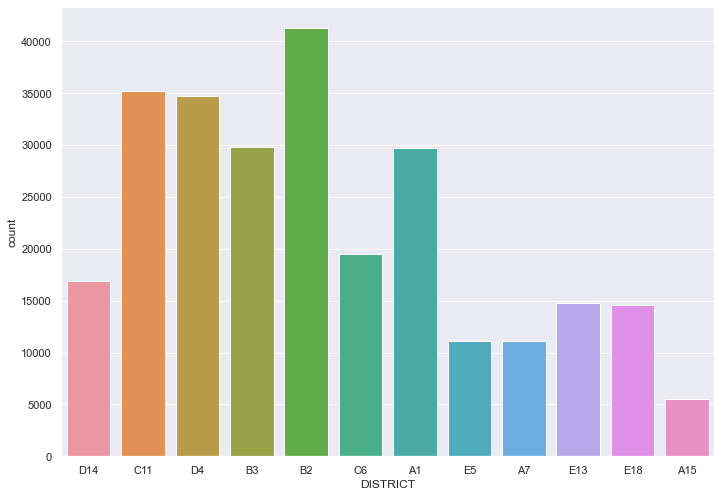

In [32]:
sns.countplot(data=crime_data,
              x='DISTRICT')

In [33]:
crime_data.DISTRICT.value_counts()

B2     41258
C11    35166
D4     34711
B3     29825
A1     29702
C6     19519
D14    16847
E13    14735
E18    14608
A7     11118
E5     11081
A15     5478
Name: DISTRICT, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

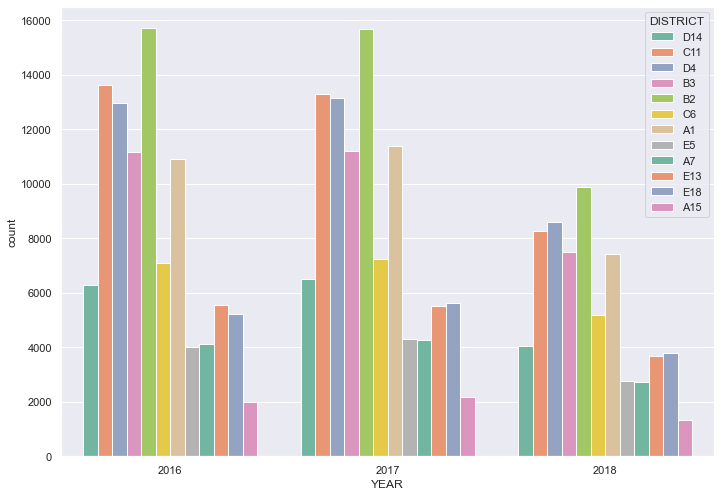

In [34]:
sns.countplot(data=crime_data,
              x='YEAR',
              hue='DISTRICT', palette="Set2")

In [35]:
crime_data.groupby(['DISTRICT', 'YEAR']).size().unstack(fill_value=0)

YEAR,2016,2017,2018
DISTRICT,,,
A1,10923,11375,7404
A15,1986,2167,1325
A7,4130,4264,2724
B2,15706,15680,9872
B3,11145,11195,7485
C11,13603,13281,8282
C6,7073,7247,5199
D14,6279,6509,4059
D4,12953,13157,8601


In [36]:
len(crime_data)

265685

In [37]:
crime_data.__len__()

265685

## Map Plotting <a class="anchor" id="map"></a>

In [38]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                       zoom_start = 11)
data_heatmap = crime_data[crime_data.YEAR == 2018]
data_heatmap = crime_data[['Lat','Long']]
data_heatmap = crime_data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)
crime_map.save("output/boston_crime_map.html")